In [1]:
import ROOT
import numpy as np

# Investigating p-values

We have already met p-values when learning about the hypothesis test.  We identified two p-values related to the hypothesis test:
* The size (or significance) of the hypothesis test is a p-value.  Specifically it's the p-value for the null or H0 hypothesis.  We labeled this $\alpha$ and also called this the Type-I Error.
* The power of the test is related to the p-value  of the alternative hypothesis, $\beta$, as $P=(1-\beta)$.  The value $\beta$ is also the Type-II Error.

For the hypothesis test, the p-values listed above are not random.  We fix the size of the test $\alpha$ to a value of our choosing.  This choice defines the value of $\beta$, which fixes the power of the test.

However, we can also interpret the p-value as a random number associated with the data we might observe in an experiment.  The p-value will take a value between 0 and 1, and we can use the p-value to make a statement about the relative compatibility of the hypothesis that generated the p-value and the data.  We call this "goodness of fit".

We will explore two examples in this notebook.  The first will be a vanilla Gaussian model.  The second will be a more practical example that should help with context.

In [2]:
#Create a random number generator
rng = ROOT.TRandom3(11223344)

# Model number 1: Gaussian PDF
def model1(_rng):
    return _rng.Gaus(50,10)

# Model number 2: rolling 4 dice
def rollDice(rando):
    return int(rando*6+0.99)
    
def model2(_rng):
    out = rollDice(_rng.Rndm())
    out += rollDice(_rng.Rndm())
    out += rollDice(_rng.Rndm())
    out += rollDice(_rng.Rndm())
    return out

In [3]:
# Histograms
modelOneTrials = ROOT.TH1F("Model 1","Model 1",100,0,100)
modelTwoTrials = ROOT.TH1F("Model 2","Model 2",24,1,24)

# And arrays
model1Array = []
model2Array = []

#Make a bunch of random numbers
for i in range(0,10000000):
    model1Array.append(model1(rng))
    model2Array.append(model2(rng))

    modelOneTrials.Fill(model1Array[i])
    modelTwoTrials.Fill(model2Array[i])

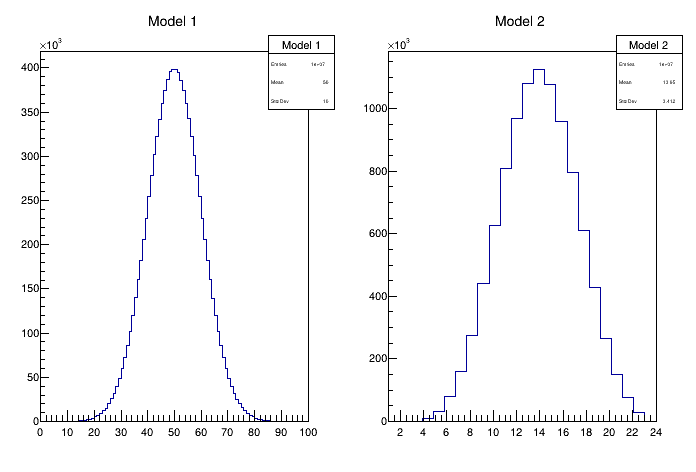

In [4]:
# Draw!
can1 = ROOT.TCanvas("One","One")
can1.Divide(2,1)
can1.cd(1)
modelOneTrials.Draw()
can1.cd(2)
modelTwoTrials.Draw()
can1.Draw()

### 
Random p-values!

Let's now draw a random trial from each PDF and evaluate the p-value for that trial.  Recall the definition of a p-value: the probability of an outcome at least as extreme as the one observed.  Our random trial will be our observed outcome.  Thus, to find our p-value we have to decide which direction is "more extreme".  This isn't arbitrary and really defines our alternative hypothesis.

For example, if we are testing the hypothesis that our Gaussian PDF has a mean value of no more than 50, we would consider extreme to be values larger than 50.  Thus, the integral for the p-value would be from the observed outcome to infinity.

And vice versa, if our hypothesis is that the Gaussian PDF has a mean value no less than 50, the p-value integral would be from negative infinity to the observed outcome.

For our case, we will make the assumption that a higher value is more extreme and we will integrate from the observed outcome to infinity.

Run this cell a few times to get a feeling for how it all works. Refer back to the histograms, as needed.

Model 1 outcome:  52.131407768300775
Model 2 outcome:  17

Model 1 p-value:  0.4154883
Model 2 p-value:  0.2360812

True Model 1 p-value:  0.4156085799965453

Model 1 Z-value:  0.21344921094159144
Model 2 Z-value:  0.718965138036883
1.0


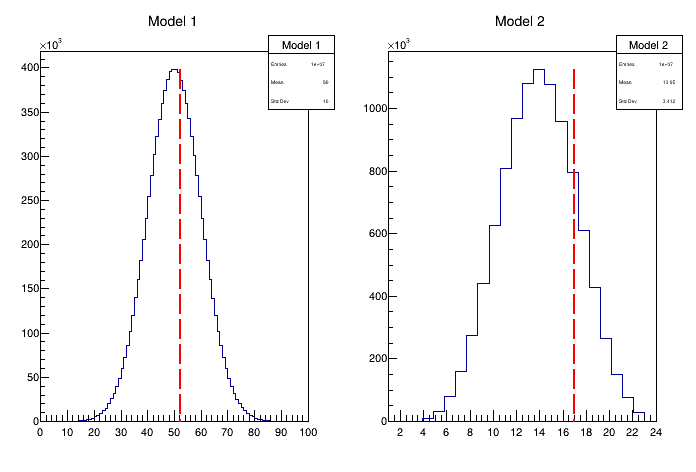

In [5]:
# Draw a random trial to represent our observed outcome
model1outcome = model1(rng)
model2outcome = model2(rng)

print("Model 1 outcome: ",model1outcome)
print("Model 2 outcome: ",model2outcome)

# Calculate p-values!
# This is easier to do with a numpy array
npArray1 = np.array(model1Array)
npArray2 = np.array(model2Array)

model1pvalue = (npArray1>=model1outcome).sum()/len(model1Array)
model2pvalue = (npArray2>=model2outcome).sum()/len(model2Array)
print("\nModel 1 p-value: ",model1pvalue)
print("Model 2 p-value: ",model2pvalue)

# And let's also calculate what we SHOULD get from the Gaussian PDF, for fun
print("\nTrue Model 1 p-value: ",1-ROOT.TMath.Freq((model1outcome-50)/10))

# And just for fun (lots of fun today!), 
# let's convert these p-values into quantiles of the Gaussian PDF
print("\nModel 1 Z-value: ",ROOT.TMath.NormQuantile(1-model1pvalue))
print("Model 2 Z-value: ",ROOT.TMath.NormQuantile(1-model2pvalue))

# Draw!
can2 = ROOT.TCanvas("Two","Two")
can2.Divide(2,1)
can2.cd(1)
modelOneTrials.Draw()
l1 = ROOT.TLine(model1outcome,0,model1outcome,modelOneTrials.GetMaximum())
l1.SetLineWidth(2)
l1.SetLineColor(ROOT.kRed)
l1.SetLineStyle(9)
l1.Draw("same")
can2.cd(2)
modelTwoTrials.Draw()
l2 = ROOT.TLine(model2outcome,0,model2outcome,modelTwoTrials.GetMaximum())
print(modelTwoTrials.GetYaxis().GetXmax())
l2.SetLineWidth(2)
l2.SetLineColor(ROOT.kRed)
l2.SetLineStyle(9)
l2.Draw("same")
can2.Draw()

# PDF of p-values and Z-values?

As discussed in the lecture, the PDF for the p-value should be a uniform distribution.  Why? Because if we're truly sampling from the underlying PDF that we're using to calculate p-values, the random samples will follow that PDF and, thus, all values of the cumulative distribution function will be sampled equally.

But what about the Z-values?  Let's make the distribution of Z-values and see what we get. 

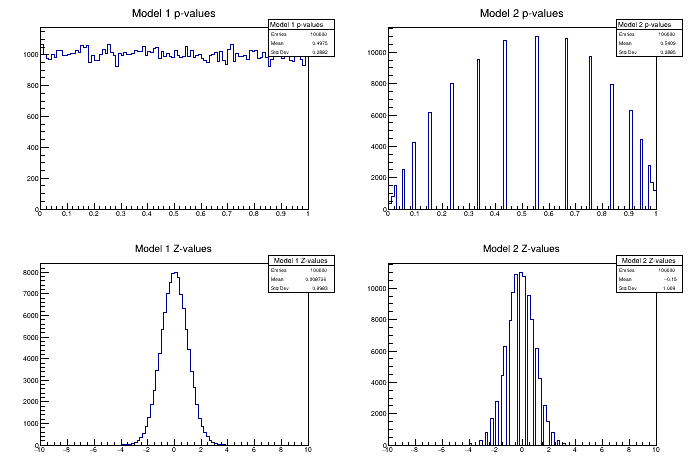

In [6]:
# Histograms
modelOnePvals = ROOT.TH1F("Model 1 p-values","Model 1 p-values",100,0,1)
modelOneZvals = ROOT.TH1F("Model 1 Z-values","Model 1 Z-values",100,-10,10)
modelTwoPvals = ROOT.TH1F("Model 2 p-values","Model 2 p-values",100,0,1)
modelTwoZvals = ROOT.TH1F("Model 2 Z-values","Model 2 Z-values",100,-10,10)

l1 = len(model1Array)
l2 = len(model2Array)
#Make a bunch of random numbers
for i in range(0,100000):
    r1 = model1(rng)
    p1 = (npArray1>=r1).sum()/l1
    modelOnePvals.Fill(p1)
    modelOneZvals.Fill(ROOT.TMath.NormQuantile(1-p1))

    r2 = model2(rng)
    p2 = (npArray2>=r2).sum()/l2
    modelTwoPvals.Fill(p2)
    modelTwoZvals.Fill(ROOT.TMath.NormQuantile(1-p2))

modelOnePvals.GetYaxis().SetRangeUser(0,modelOnePvals.GetMaximum()*1.1)
# Draw!
can3 = ROOT.TCanvas("three","three")
can3.Divide(2,2)
can3.cd(1)
modelOnePvals.Draw()
can3.cd(2)
modelTwoPvals.Draw()
can3.cd(3)
modelOneZvals.Draw()
can3.cd(4)
modelTwoZvals.Draw()
can3.Draw()